# TP1: Composição Chroma Key

In [81]:
%reset
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as skie
import seaborn as sns
import skimage as sk
import skimage.io as io
import skimage.color as color
from skimage.transform import rescale
from skimage import img_as_float
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [82]:
def hist(img):
    color = [ 'r','g','b']
    for i, c in enumerate(color) :
        plt.hist(img[:,:,i].flatten(),256, color=c)
    plt.show()


Função que dá só o histograma do verde.

In [83]:
def histverde(img):
    plt.hist(img[:,:,1].flatten(),256, color='g')
    plt.show()

Histograma do H em hsv:

In [84]:
def hist_h(img):
    plt.hist(img[:,:,0].flatten(),256)
    plt.show()

Imagem para teste:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


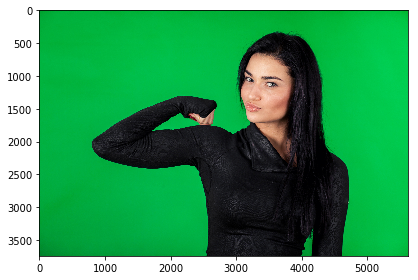

In [85]:
img = io.imread('535.jpg')   
io.imshow(img)
io.show()

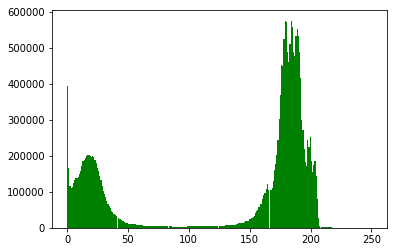

In [86]:
histverde(img)

Transforma a imagem em hsv:

In [87]:
imghsv = color.rgb2hsv(img)

Histograma só do H:

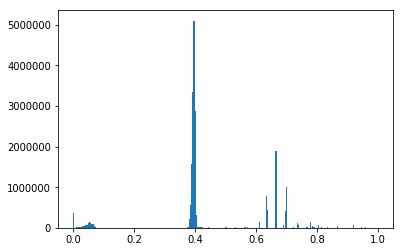

In [88]:
hist_h(imghsv)

A partir do histograma acima temos que o  verde do fundo tem hue entre 0.375 e 0.41:

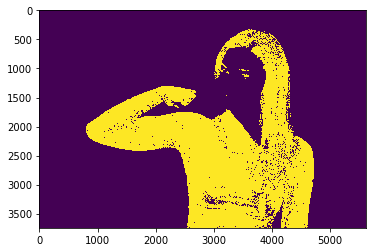

In [97]:
h, s, v = np.rollaxis(imghsv, axis=-1)
plt.imshow(h>0.41)

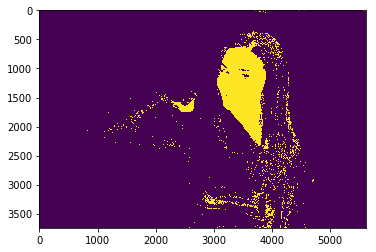

In [98]:
plt.imshow(h<0.375)

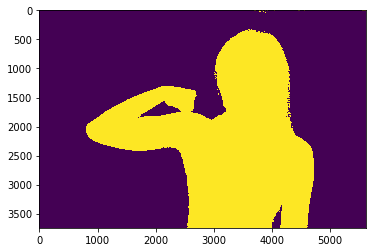

In [91]:
mask = (0.41<h) | (h<0.375)
plt.imshow(mask)

Tentativa pra substituir a mascara:
### Dá pra fazer sem esse monte de iteração??

In [103]:
def mascara(img, mascara):
    resultado = np.ones(img.shape)
    for i in range(3) :
         resultado[:,:,i] = np.multiply(mascara,img[:,:,i])
    return resultado

In [106]:
imgsemverde = mascara(imghsv,mask)

In [108]:
finalrgb= color.hsv2rgb(imgsemverde)

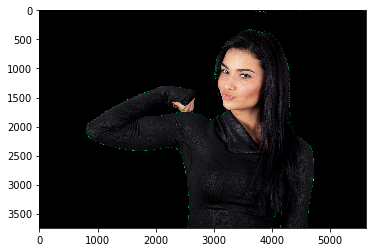

In [109]:
plt.imshow(finalrgb)